In [24]:
import matplotlib.pyplot as plt
import graphviz

from tp_tree_source import *
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

<img src="questions/1.png" alt="question 1" width="800"/>

Mesure d'homogénéité - Ratio d'Erreur de Classification (REC) :

- Définition : Le REC est calculé comme la proportion d'observations de la classe majoritaire dans un nœud. Si un nœud contient des données de plusieurs classes, la proportion de la classe majoritaire est utilisée pour calculer le REC.
- Formule : REC = 1 - max(nombre d'observation de classe majoritaire / total d'observations dans le noeud)
- Justification : Cette mesure est intuitive et facile à comprendre. Elle représente directement la probabilité de mal classer une observation si on devait prédire la classe majoritaire dans chaque nœud. Un REC faible indique une grande homogénéité, et un REC élevé indique une hétérogénéité significative. Cette mesure peut être particulièrement utile dans des situations où les classes sont très déséquilibrées, car elle se concentre sur la prédominance d'une classe particulière dans chaque nœud.

Cette mesure offre une alternative simple et directe aux mesures plus classiques comme l'indice de Gini ou l'entropie, et peut être utilisée dans le cadre de l'élaboration de modèles d'arbres de décision pour évaluer la pureté des nœuds.

<img src="questions/2.png" alt="question 2" width="800"/>

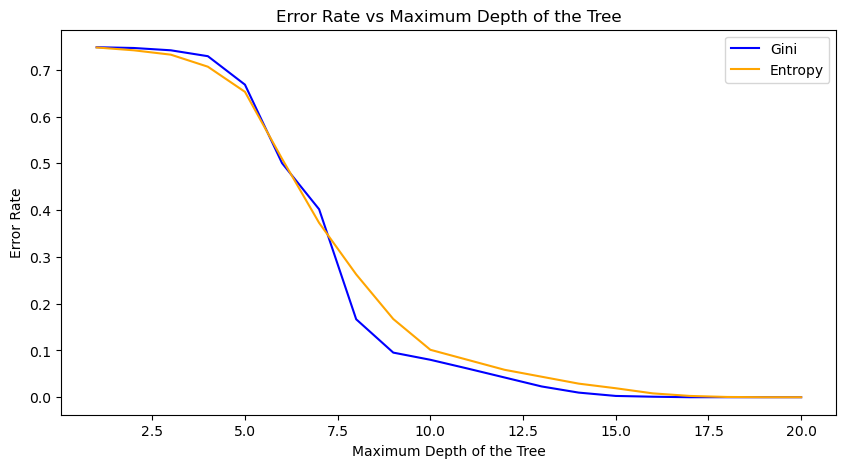

In [14]:
n_samples = 456  # Total number of samples
data = rand_checkers(n1=n_samples, n2=n_samples, n3=n_samples, n4=n_samples, sigma=0.1)
X = data[:, :2]
y = data[:, 2]

# Initialize lists to store error rates for different criteria
error_rates_gini = []
error_rates_entropy = []

# Test different maximum depths of the tree
max_depths = range(1, 21)  # From 1 to 20
for max_depth in max_depths:
    # Decision tree with Gini impurity
    clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=max_depth)
    clf_gini.fit(X, y)
    # Compute error rate as 1 - accuracy
    error_rates_gini.append(1 - clf_gini.score(X, y))
    
    # Decision tree with entropy
    clf_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf_entropy.fit(X, y)
    # Compute error rate as 1 - accuracy
    error_rates_entropy.append(1 - clf_entropy.score(X, y))

# Plotting the error rates
plt.figure(figsize=(10, 5))
plt.plot(max_depths, error_rates_gini, color='blue', label='Gini')
plt.plot(max_depths, error_rates_entropy, color='orange', label='Entropy')
plt.xlabel('Maximum Depth of the Tree')
plt.ylabel('Error Rate')
plt.title('Error Rate vs Maximum Depth of the Tree')
plt.legend()
plt.show()

<img src="questions/3.png" alt="question 3" width="800"/>

Text(0.5, 1.0, 'Decision Boundary for Entropy (Train Set)')

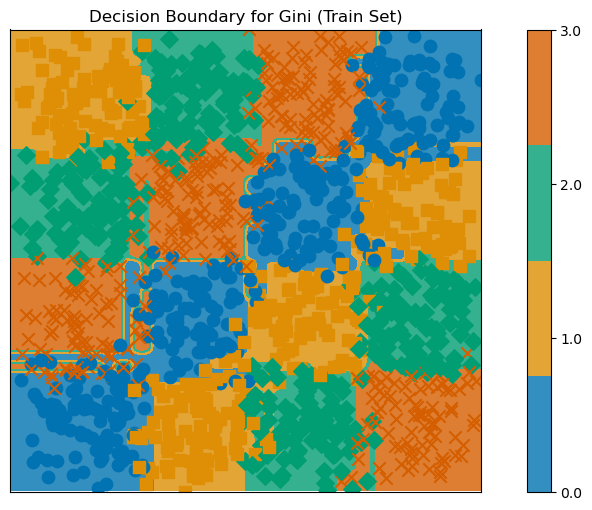

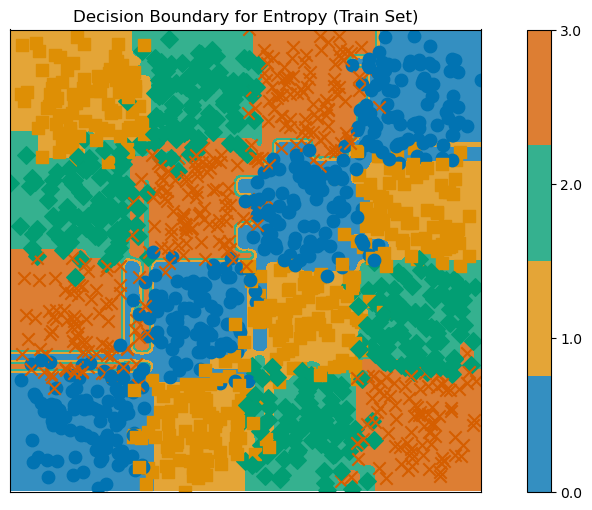

In [18]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train decision tree classifiers on the training data
clf_gini_train = DecisionTreeClassifier(criterion='gini', random_state=0)
clf_gini_train.fit(X_train, y_train)

clf_entropy_train = DecisionTreeClassifier(criterion='entropy', random_state=0)
clf_entropy_train.fit(X_train, y_train)

# Define functions for the trained classifiers
def f_gini_train(x):
    return clf_gini_train.predict(x.reshape(1, -1))

def f_entropy_train(x):
    return clf_entropy_train.predict(x.reshape(1, -1))

# Plot the decision boundaries for the trained classifiers using the training data
plt.figure(figsize=(12, 6))
frontiere_new(f=f_gini_train, X=X_train, y=y_train, step=50)
plt.title('Decision Boundary for Gini (Train Set)')

plt.figure(figsize=(12, 6))
frontiere_new(f=f_entropy_train, X=X_train, y=y_train, step=50)
plt.title('Decision Boundary for Entropy (Train Set)')


<img src="questions/4.png" alt="question 4" width="800"/>

In [25]:
# Export the decision tree to a dot file
dot_data_gini = export_graphviz(clf_gini_train, out_file=None, 
                                feature_names=['x1', 'x2'],
                                class_names=['0', '1', '2', '3'],
                                filled=True, rounded=True,  
                                special_characters=True)

dot_data_entropy = export_graphviz(clf_entropy_train, out_file=None, 
                                   feature_names=['x1', 'x2'],
                                   class_names=['0', '1', '2', '3'],
                                   filled=True, rounded=True,  
                                   special_characters=True)

# Generate a PDF file for each tree
gini_graph = graphviz.Source(dot_data_gini)
entropy_graph = graphviz.Source(dot_data_entropy)

# Save the PDFs to the output directory
gini_graph_path = 'graph/gini_decision_tree.dot'
entropy_graph_path = 'graph/entropy_decision_tree.dot'

with open(gini_graph_path, 'w') as f:
    f.write(dot_data_gini)

with open(entropy_graph_path, 'w') as f:
    f.write(dot_data_entropy)

<img src="questions/5.png" alt="question 5" width="800"/>

<img src="questions/6.png" alt="question 6" width="800"/>

<img src="questions/7.png" alt="question 7" width="800"/>

<img src="questions/8.png" alt="question 8" width="800"/>